In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [16]:
# Load dataset
df = pd.read_csv("Loan_Train.csv")

In [3]:
# View first few rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Shape and info
print("Dataset Shape:", df.shape)
print(df.info())

# Check for null values
print("\nMissing Values:\n", df.isnull().sum())

# Summary stats
df.describe(include='all')

Dataset Shape: (614, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

Missing Values:
 Loan_ID               0
Gender               13
Married         

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


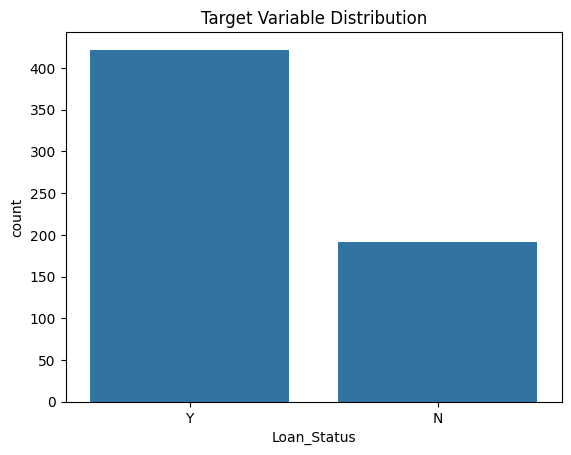

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


In [5]:
# Check class balance
sns.countplot(x='Loan_Status', data=df)
plt.title("Target Variable Distribution")
plt.show()

print(df['Loan_Status'].value_counts(normalize=True))

In [3]:
# Fill missing categorical with mode, numerical with median
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

NameError: name 'df' is not defined

In [7]:
# Use LabelEncoder for simplicity
le = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = le.fit_transform(df[column])

In [8]:
scaler = StandardScaler()
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
X_scaled = scaler.fit_transform(X)
y = df['Loan_Status']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [11]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [30]:
def evaluate(y_true, y_pred, model_name):
    print(f"\n{model_name} Evaluation Metrics:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

evaluate(y_test, y_pred_lr, "Logistic Regression")
evaluate(y_test, y_pred_dt, "Decision Tree")


Logistic Regression Evaluation Metrics:
Accuracy: 0.7886178861788617
Precision: 0.7596153846153846
Recall: 0.9875
F1 Score: 0.8586956521739131
Confusion Matrix:
 [[18 25]
 [ 1 79]]

Decision Tree Evaluation Metrics:
Accuracy: 0.6910569105691057
Precision: 0.7560975609756098
Recall: 0.775
F1 Score: 0.7654320987654321
Confusion Matrix:
 [[23 20]
 [18 62]]


In [32]:
from sklearn.metrics import classification_report

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{'='*50}")
    print(f"{model_name.upper()} PERFORMANCE METRICS")
    print('='*50)
    
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Print metrics
    print(f"\nAccuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
    # Confusion matrix visualization
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Approved', 'Approved'],
                yticklabels=['Not Approved', 'Approved'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['Not Approved', 'Approved']))



LOGISTIC REGRESSION PERFORMANCE METRICS

Accuracy: 0.79
Precision: 0.76
Recall: 0.99
F1 Score: 0.86


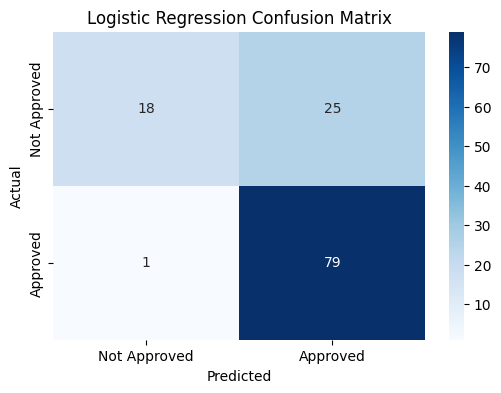


Classification Report:
              precision    recall  f1-score   support

Not Approved       0.95      0.42      0.58        43
    Approved       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


DECISION TREE PERFORMANCE METRICS

Accuracy: 0.69
Precision: 0.76
Recall: 0.78
F1 Score: 0.77


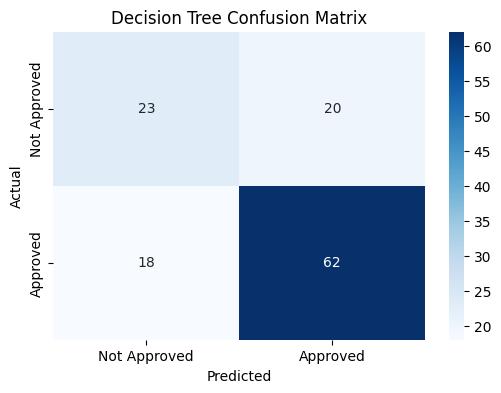


Classification Report:
              precision    recall  f1-score   support

Not Approved       0.56      0.53      0.55        43
    Approved       0.76      0.78      0.77        80

    accuracy                           0.69       123
   macro avg       0.66      0.65      0.66       123
weighted avg       0.69      0.69      0.69       123



In [33]:
# Evaluate both models
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")


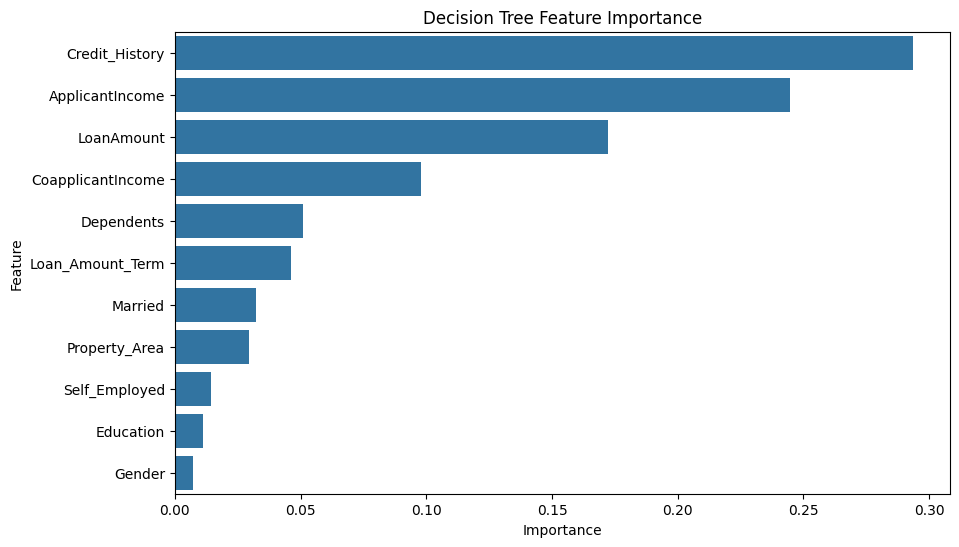

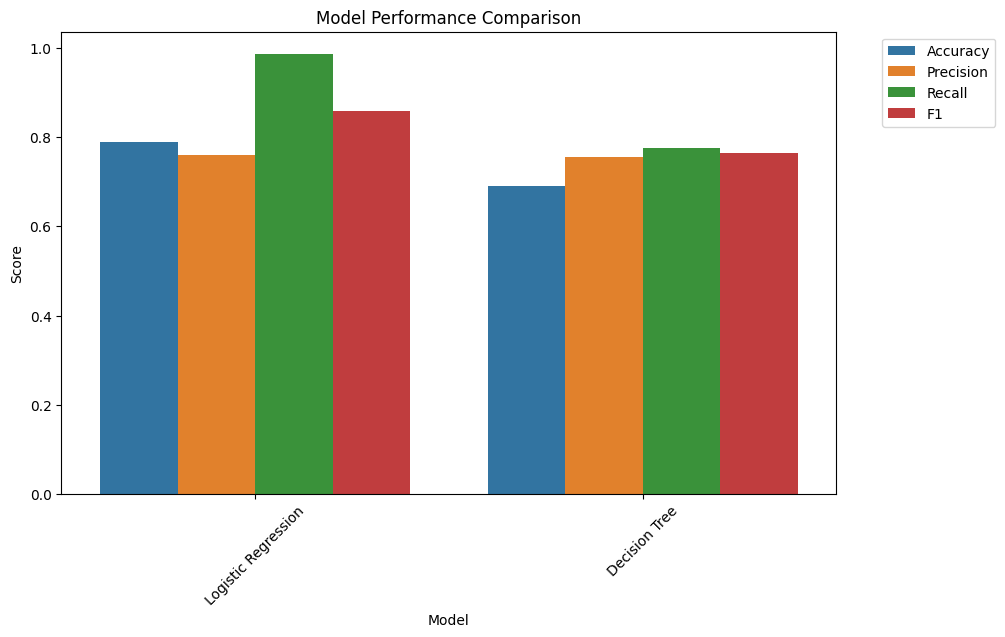

In [42]:
# Feature importance for Decision Tree 
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Decision Tree Feature Importance')
plt.show()

# Compare model performance
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt)],
    'Precision': [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_dt)],
    'Recall': [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_dt)],
    'F1': [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_dt)]
})

# Melt for better visualization
melted_results = results.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=melted_results)
plt.title('Model Performance Comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [41]:
# Conclusions and Recommendations

print("""
FINAL CONCLUSIONS AND RECOMMENDATIONS
=====================================

1. Model Performance Summary:
""")

display(results)

print("""
2.  Findings:
- The Logistic Regression model is better than  the Decision Tree in all metrics except precision.
- Both models show good recall.
- The Decision Tree has slightly better precision but much lower recall and accuracy.

3. Business Implications:
- The high recall but lower precision of Logistic Regression means it approves most deserving applicants (good) 
  but may also approve some undeserving ones (higher risk for the bank).
- The Decision Tree is more balanced but misses more deserving applicants (lower recall).

4. Recommendations:
- For a conservative approach (minimizing bad loans), consider the Decision Tree despite its lower accuracy.
- For maximizing approvals of deserving applicants, use Logistic Regression.
- Consider feature engineering to improve model performance, particularly focusing on:
""")

display(feature_importance.head(5))


print("""
5. Next Steps:
- Collect more data to improve model performance

""")


FINAL CONCLUSIONS AND RECOMMENDATIONS

1. Model Performance Summary:



,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.788618,0.759615,0.9875,0.858696
1,Decision Tree,0.691057,0.756098,0.7750,0.765432



2.  Findings:
- The Logistic Regression model is better than  the Decision Tree in all metrics except precision.
- Both models show good recall.
- The Decision Tree has slightly better precision but much lower recall and accuracy.

3. Business Implications:
- The high recall but lower precision of Logistic Regression means it approves most deserving applicants (good) 
  but may also approve some undeserving ones (higher risk for the bank).
- The Decision Tree is more balanced but misses more deserving applicants (lower recall).

4. Recommendations:
- For a conservative approach (minimizing bad loans), consider the Decision Tree despite its lower accuracy.
- For maximizing approvals of deserving applicants, use Logistic Regression.
- Consider feature engineering to improve model performance, particularly focusing on:



,Feature,Importance
9,Credit_History,0.293493
5,ApplicantIncome,0.244570
7,LoanAmount,0.172321
6,CoapplicantIncome,0.098029
2,Dependents,0.050823



5. Next Steps:
- Collect more data to improve model performance


